In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
#data=pd.read_csv('/kaggle/input/data-cap/data_set_1_capstone.xlsx')
data= pd.read_csv(r'C:\Users\surya.r3\Desktop\data_set_1_capstone_csv.csv')

In [2]:
data.head(100)

,Last_promotion_gsp,Years@Current Mangers,Education,EducationField,Employee_ID,Env_Satisfaction,Gender,HourlyRate,Job_Involvement,JobLevel,...,Stock Option Level,Total Working Years,Training time spent,Work LifeBalance,Years @company,Years@Current role,BusinessTravel,Dept,Travel_distance,Attrition
0,0,2,Master,Human Resources,133,3,Male,63,3,1,...,0,7,3,3.0,3,2,Travel_Rarely,Human Resources,6,Yes
1,2,2,Master,Human Resources,140,3,Female,32,2,5,...,1,30,3,3.0,3,2,Non-Travel,Human Resources,2,No
2,4,4,Bachelor,Human Resources,148,4,Female,30,4,4,...,0,23,3,3.0,5,3,Non-Travel,Human Resources,26,No
3,4,7,Bachelor,Human Resources,184,3,Male,48,3,2,...,0,12,2,1.0,11,9,Travel_Rarely,Human Resources,9,No
4,1,0,Bachelor,Human Resources,424,1,Male,62,2,2,...,0,9,1,3.0,2,2,Travel_Rarely,Human Resources,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,Master,Life Sciences,116,4,Male,96,3,1,...,2,10,4,3.0,4,2,Travel_Rarely,Research & Development,9,No
96,10,8,Bachelor,Life Sciences,117,3,Male,99,2,2,...,3,11,3,3.0,11,10,Travel_Rarely,Research & Development,2,No
97,11,11,Master,Life Sciences,119,3,Male,78,2,4,...,1,22,3,2.0,22,3,Travel_Frequently,Research & Development,1,No
98,0,0,Below College,Life Sciences,134,4,Male,71,3,1,...,0,1,2,3.0,1,0,Travel_Rarely,Research & Development,1,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Last_promotion_gsp         2940 non-null   int64  
 1   Years@Current Mangers      2940 non-null   int64  
 2   Education                  2940 non-null   object 
 3   EducationField             2940 non-null   object 
 4   Employee_ID                2940 non-null   int64  
 5   Env_Satisfaction           2940 non-null   int64  
 6   Gender                     2940 non-null   object 
 7   HourlyRate                 2940 non-null   int64  
 8   Job_Involvement            2940 non-null   int64  
 9   JobLevel                   2940 non-null   int64  
 10  JobRole                    2940 non-null   object 
 11  Job satisfac               2940 non-null   int64  
 12  Marital Status             2940 non-null   object 
 13  Monthly Income             2940 non-null   int64

In [4]:
data.columns
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]
print(cols_with_missing)


['Work LifeBalance']


In [5]:
data['Work LifeBalance'].dtypes
data['Work LifeBalance'].isnull().sum()

49

In [6]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(data[cols_with_missing]))
data[cols_with_missing] = imputed_data 

In [7]:
data['Work LifeBalance']=data['Work LifeBalance'].astype(int)
data['Work LifeBalance'].isnull().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Last_promotion_gsp         2940 non-null   int64 
 1   Years@Current Mangers      2940 non-null   int64 
 2   Education                  2940 non-null   object
 3   EducationField             2940 non-null   object
 4   Employee_ID                2940 non-null   int64 
 5   Env_Satisfaction           2940 non-null   int64 
 6   Gender                     2940 non-null   object
 7   HourlyRate                 2940 non-null   int64 
 8   Job_Involvement            2940 non-null   int64 
 9   JobLevel                   2940 non-null   int64 
 10  JobRole                    2940 non-null   object
 11  Job satisfac               2940 non-null   int64 
 12  Marital Status             2940 non-null   object
 13  Monthly Income             2940 non-null   int64 
 14  Company 

In [11]:
cols_with_missing2 = [col for col in data.columns
                     if data[col].isnull().any()]
print(cols_with_missing2)
data.columns
# Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

[]
Categorical variables:
['Education', 'EducationField', 'Gender', 'JobRole', 'Marital Status', '18Yrs', 'Over Time', 'BusinessTravel', 'Dept', 'Attrition']


# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

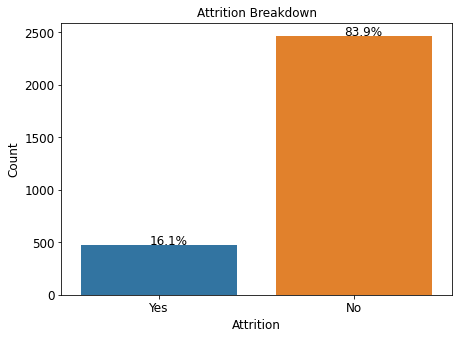

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(7,5))
ax=sns.countplot('Attrition',data=data)
plt.xticks(size=12)
plt.xlabel('Attrition',size=12)
plt.yticks(size=12)
plt.ylabel('Count',size=12)
ax.set_title('Attrition Breakdown')
without_hue(ax,data.Attrition)
plt.savefig("Attrition.png")
plt.show()


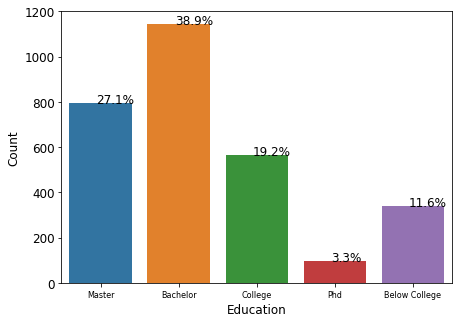

<Figure size 432x288 with 0 Axes>

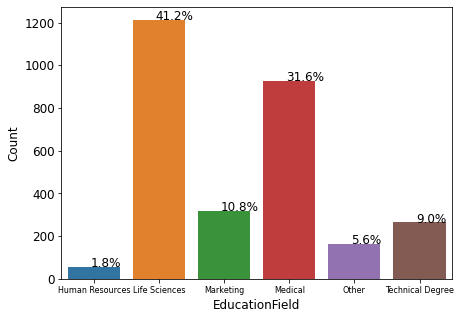

<Figure size 432x288 with 0 Axes>

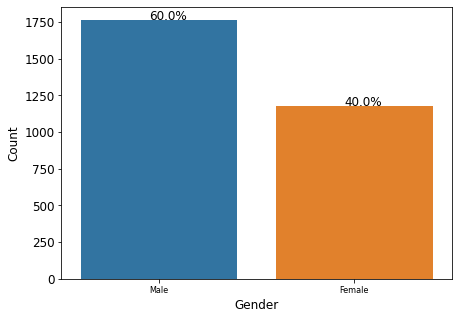

<Figure size 432x288 with 0 Axes>

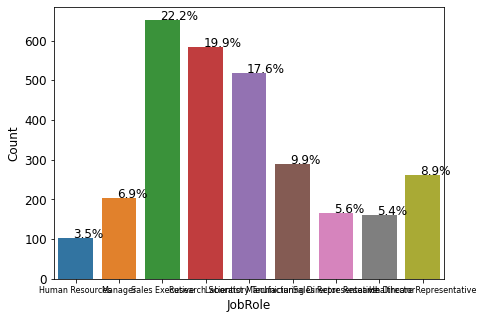

<Figure size 432x288 with 0 Axes>

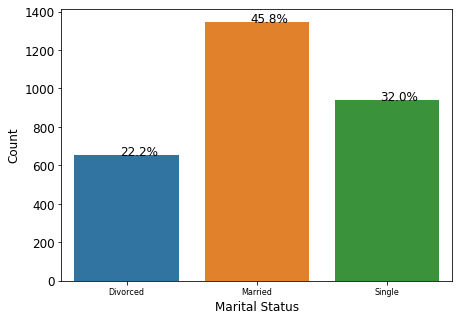

<Figure size 432x288 with 0 Axes>

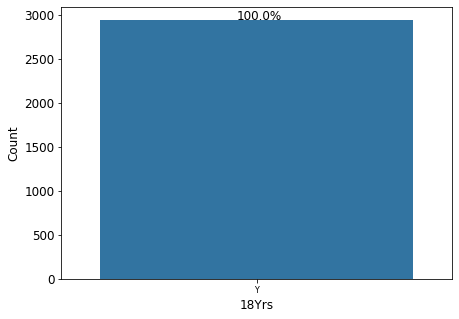

<Figure size 432x288 with 0 Axes>

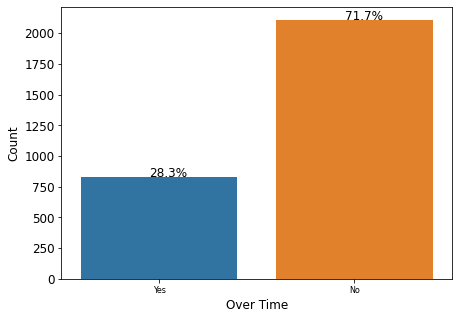

<Figure size 432x288 with 0 Axes>

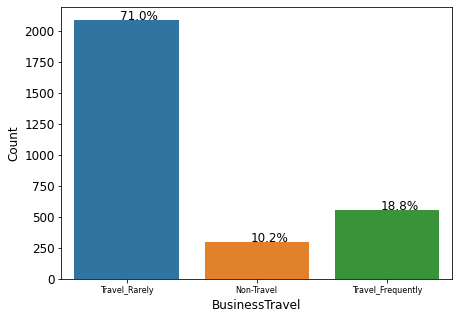

<Figure size 432x288 with 0 Axes>

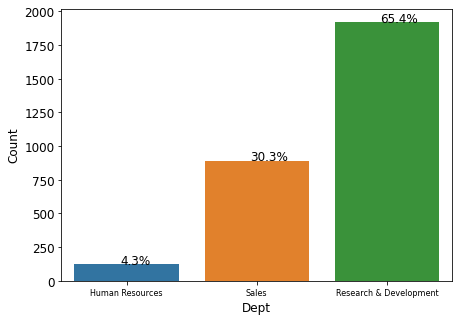

<Figure size 432x288 with 0 Axes>

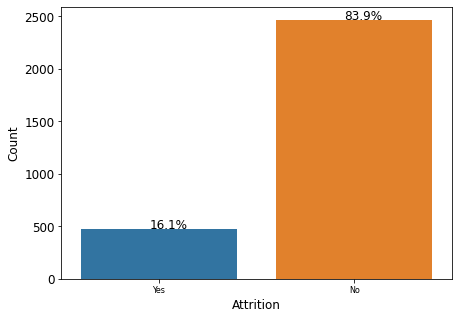

<Figure size 432x288 with 0 Axes>

In [14]:
for col in object_cols:
    plt.figure(figsize=(7,5))
    ax=sns.countplot(col,data=data)
    plt.xticks(size=8)
    plt.xlabel(col,size=12)
    plt.yticks(size=12)
    plt.ylabel('Count',size=12)
    without_hue(ax,data[col])
    plt.savefig("col.png")

**Years @company vs ['JobLevel','Dept','PercentSalaryHike','Work LifeBalance']**

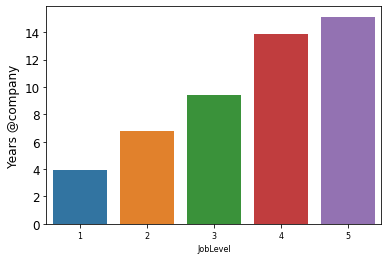

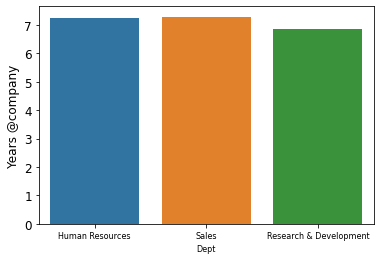

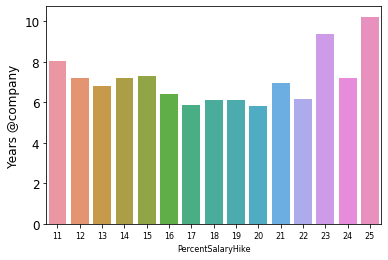

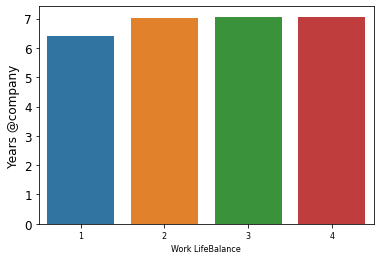

<Figure size 432x288 with 0 Axes>

In [15]:
for col in ['JobLevel','Dept','PercentSalaryHike','Work LifeBalance']:
    sns.barplot(x = col, y = "Years @company", ci = None, data =data)
    plt.xticks(size=8)
    plt.xlabel(col,size=8)
    plt.yticks(size=12)
    plt.ylabel('Years @company',size=12)
    plt.show()
    plt.savefig("Years @Company.png")

**Over Time vs ['JobLevel','Job satisfac','PercentSalaryHike','Work LifeBalance','Gender','Marital Status','Dept']**

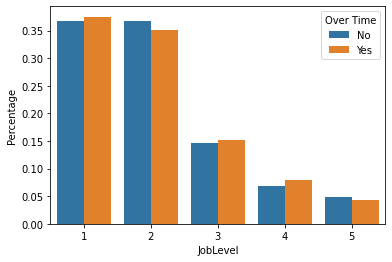

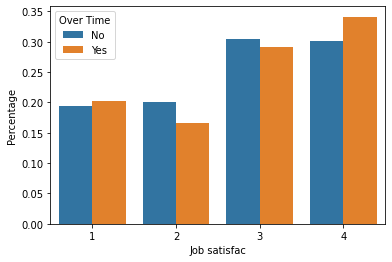

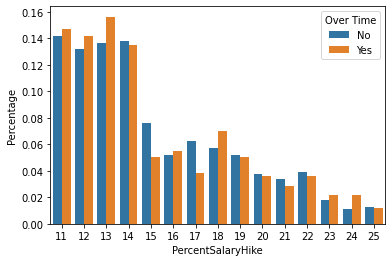

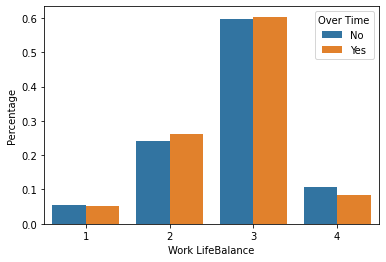

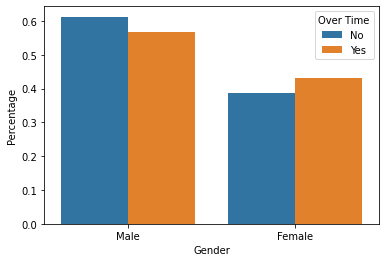

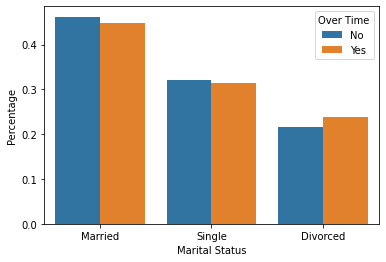

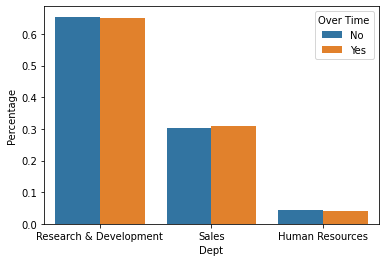

In [16]:
for col in ['JobLevel','Job satisfac','PercentSalaryHike','Work LifeBalance','Gender','Marital Status','Dept']: 
    (data[col]
    .groupby(data['Over Time'])
    .value_counts(normalize=True)
    .rename('Percentage')
    .reset_index()
    .pipe((sns.barplot, "data"), x=col, y='Percentage', hue='Over Time'))
    plt.savefig("Over Time.png")
    plt.show()

**Monthly Income vs ['EducationField','Marital Status','Gender','JobRole','Dept']**

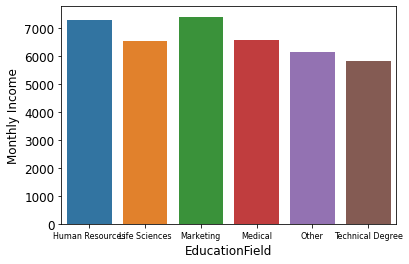

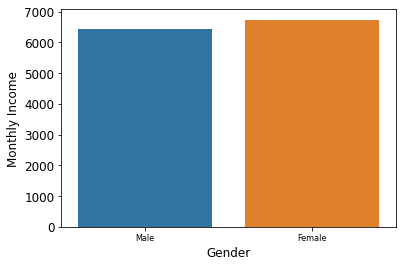

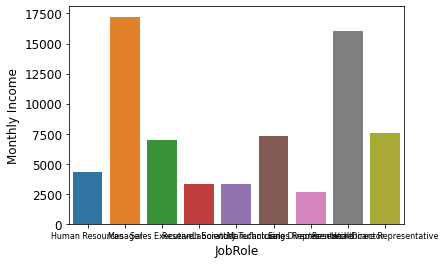

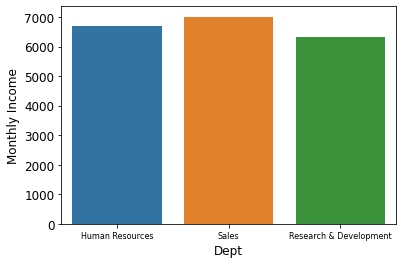

<Figure size 432x288 with 0 Axes>

In [17]:
for col in ['EducationField','Gender','JobRole','Dept']:
    sns.barplot(x = col, y = "Monthly Income", ci = None, data =data)
    plt.xticks(size=8)
    plt.xlabel(col,size=12)
    plt.yticks(size=12)
    plt.ylabel('Monthly Income',size=12)
    plt.show()
    plt.savefig("Monthly Income.png")

**Attrition vs ['JobLevel','Job satisfac','Education','PercentSalaryHike','Stock Option Level','Work LifeBalance','Gender','Marital Status','Dept','Over Time','Company Changed','Total Working Years','Last_promotion_gsp','Travel_distance','BusinessTravel']**

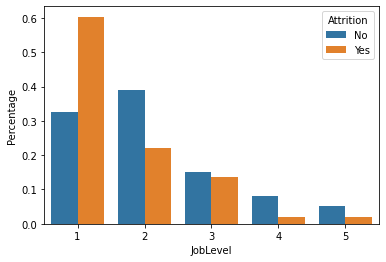

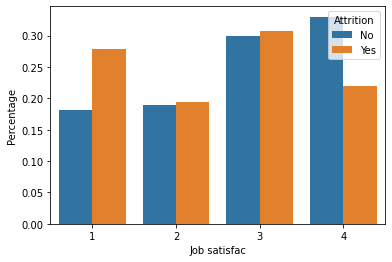

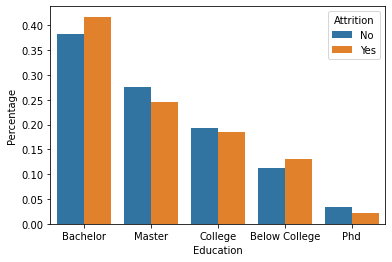

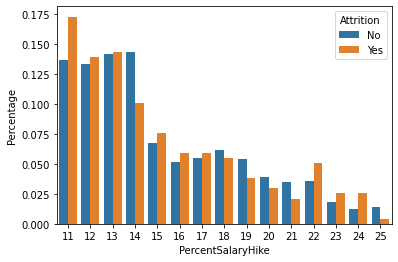

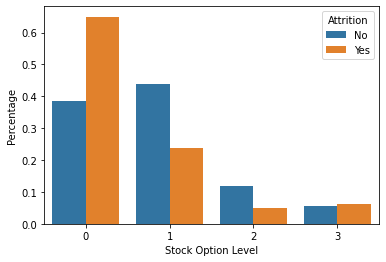

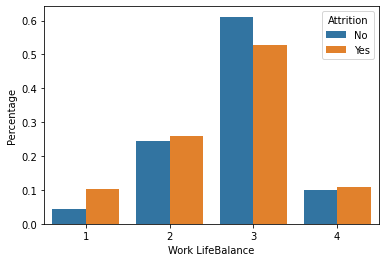

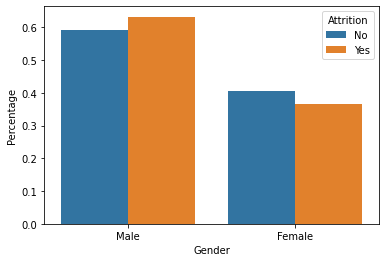

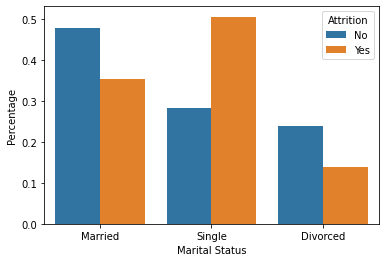

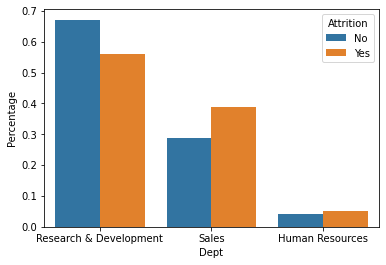

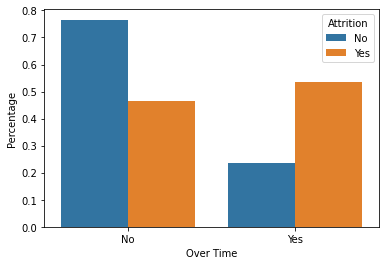

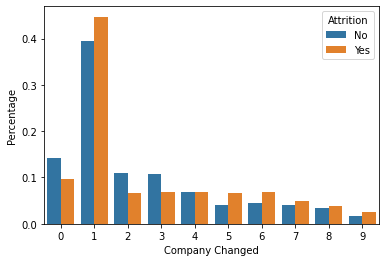

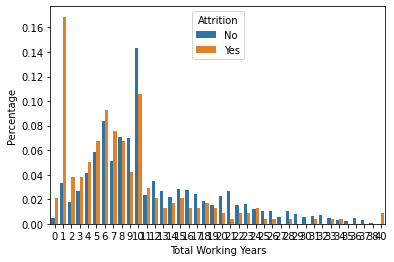

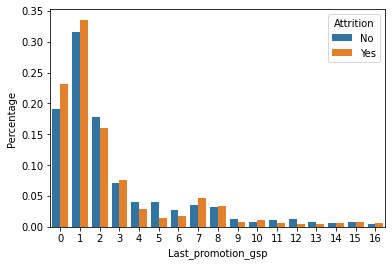

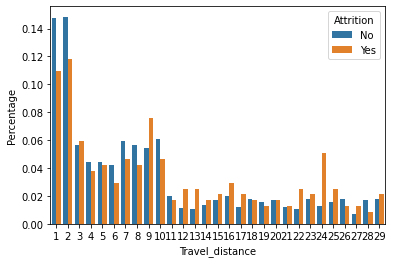

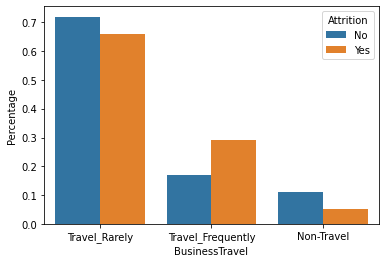

In [18]:
for col in ['JobLevel','Job satisfac','Education','PercentSalaryHike','Stock Option Level','Work LifeBalance','Gender','Marital Status','Dept','Over Time','Company Changed','Total Working Years','Last_promotion_gsp','Travel_distance','BusinessTravel']: 
    (data[col]
    .groupby(data['Attrition'])
    .value_counts(normalize=True)
    .rename('Percentage')
    .reset_index()
    .pipe((sns.barplot, "data"), x=col, y='Percentage', hue='Attrition'))
    plt.savefig("Attrition.png")
    plt.show()

**JobRole vs Monthly Income vs Gender**

<AxesSubplot:xlabel='Monthly Income', ylabel='JobRole'>

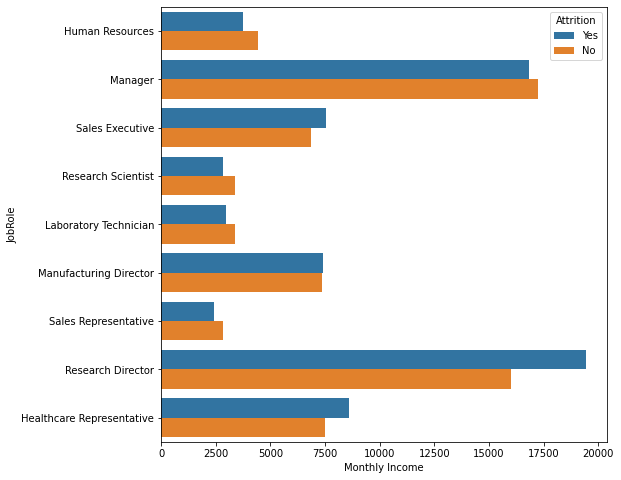

In [19]:
fig,ax =plt.subplots(figsize=(8,8))
sns.barplot(y='JobRole',x='Monthly Income',hue ='Attrition',ci=None,data=data,ax=ax)

**JobLevel vs Work Life Balance vs Attrition**

<AxesSubplot:xlabel='JobLevel', ylabel='Work LifeBalance'>

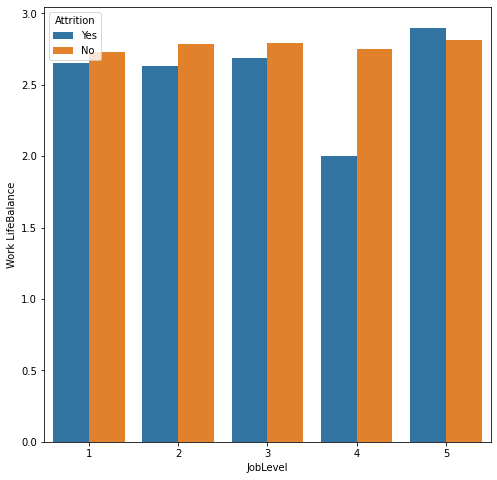

In [20]:
fig,ax =plt.subplots(figsize=(8,8))
sns.barplot(x='JobLevel',y='Work LifeBalance',hue ='Attrition',ci=None,data=data,ax=ax)

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Box Plot and Outlier removal

Last_promotion_gsp


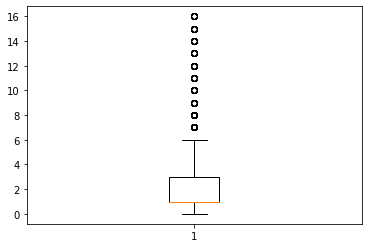

Years@Current Mangers


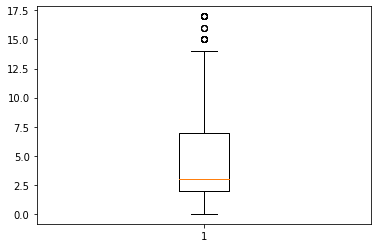

Education


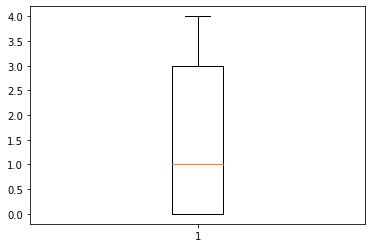

EducationField


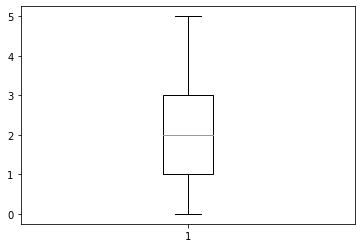

Employee_ID


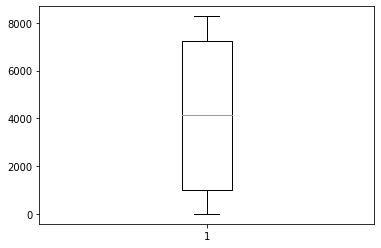

Env_Satisfaction


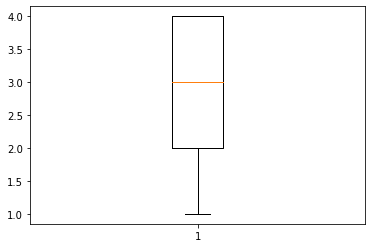

Gender


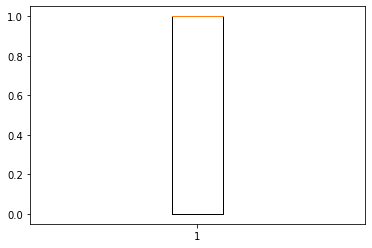

HourlyRate


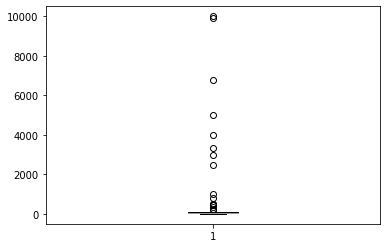

Job_Involvement


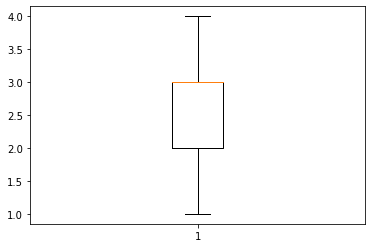

JobLevel


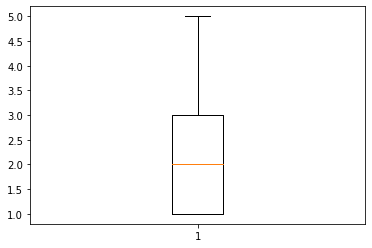

JobRole


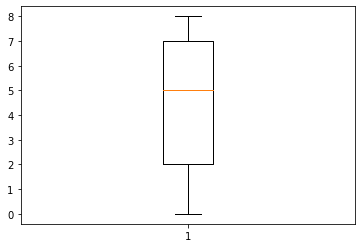

Job satisfac


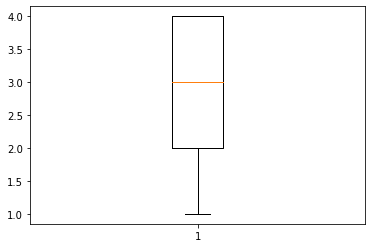

Marital Status


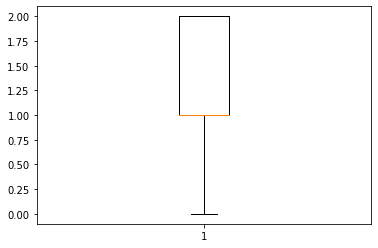

Monthly Income


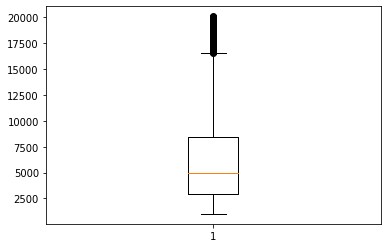

Company Changed


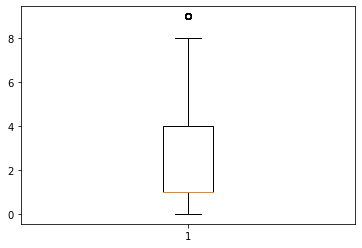

18Yrs


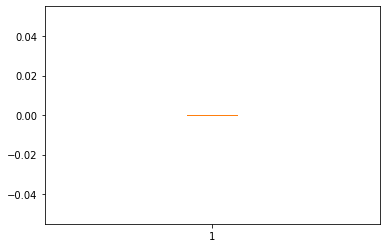

Over Time


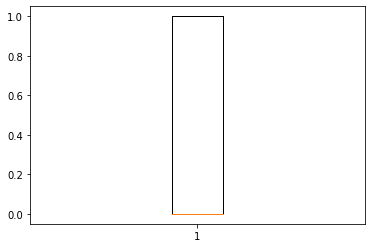

PercentSalaryHike


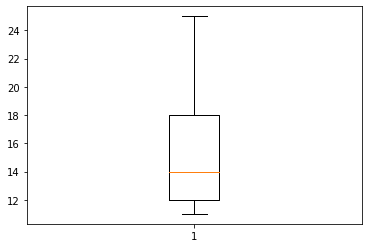

Performance Rating


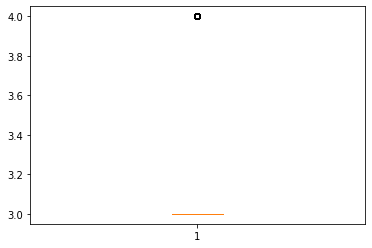

Relationship Satisfaction


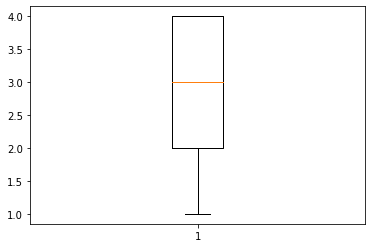

Standard Hours


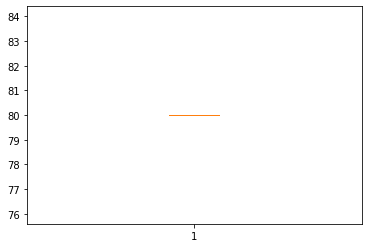

Stock Option Level


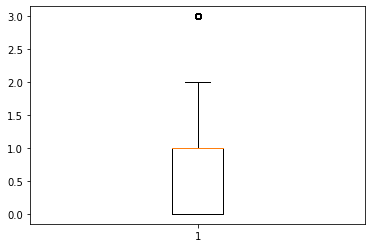

Total Working Years


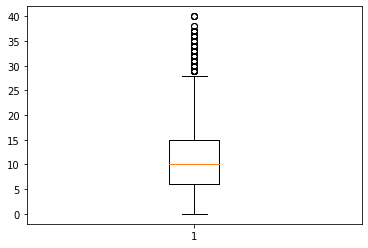

Training time spent


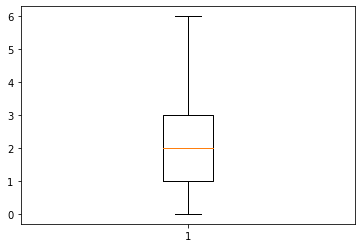

Work LifeBalance


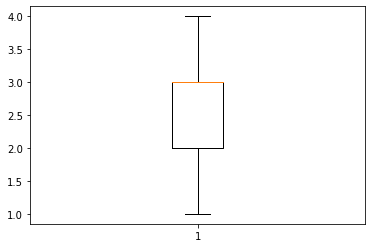

Years @company


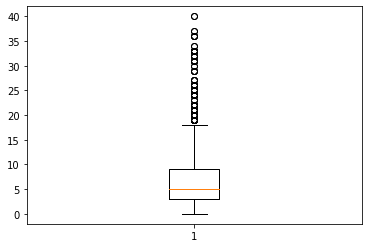

Years@Current role


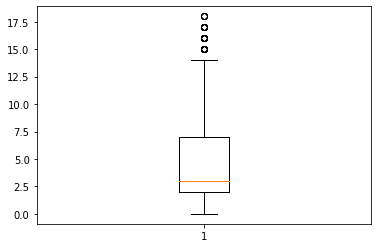

BusinessTravel


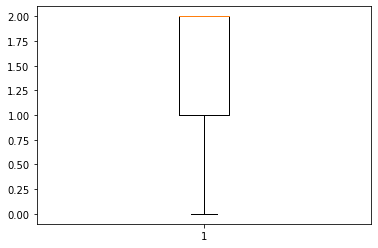

Dept


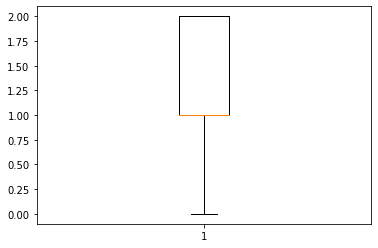

Travel_distance


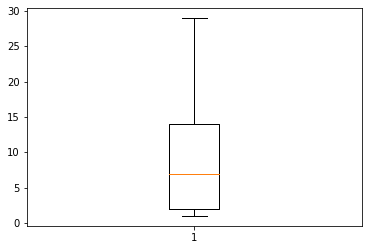

Attrition


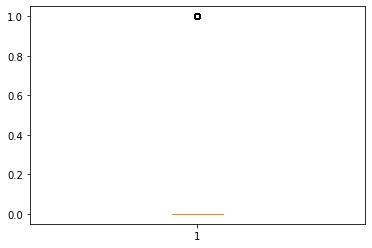

In [22]:
import matplotlib.pyplot as plt
for col in data:
    a=plt.boxplot(data[col])
    print(col)
    plt.show(a)

**Removing outliers**

In [23]:
data_no_out=data.copy()
out=data_no_out['Last_promotion_gsp'].quantile(0.95)
data_no_out=data_no_out[data_no_out['Last_promotion_gsp']<out]
out=data_no_out['Years@Current role'].quantile(0.95)
data_no_out=data_no_out[data_no_out['Years@Current role']<out]
out=data_no_out['Years @company'].quantile(0.99)
data_no_out=data_no_out[data_no_out['Years @company']<out]
out=data_no_out['Monthly Income'].quantile(0.99)
data_no_out=data_no_out[data_no_out['Monthly Income']<out]

In [24]:
data_no_out.head()

,Last_promotion_gsp,Years@Current Mangers,Education,EducationField,Employee_ID,Env_Satisfaction,Gender,HourlyRate,Job_Involvement,JobLevel,...,Stock Option Level,Total Working Years,Training time spent,Work LifeBalance,Years @company,Years@Current role,BusinessTravel,Dept,Travel_distance,Attrition
0,0,2,3,0,133,3,1,63,3,1,...,0,7,3,3,3,2,2,0,6,1
1,2,2,3,0,140,3,0,32,2,5,...,1,30,3,3,3,2,0,0,2,0
2,4,4,0,0,148,4,0,30,4,4,...,0,23,3,3,5,3,0,0,26,0
3,4,7,0,0,184,3,1,48,3,2,...,0,12,2,1,11,9,2,0,9,0
4,1,0,0,0,424,1,1,62,2,2,...,0,9,1,3,2,2,2,0,2,0


Last_promotion_gsp


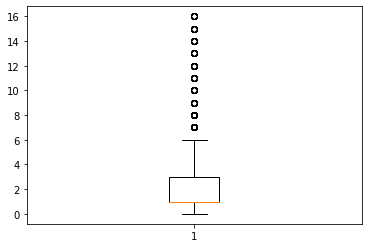

Years@Current Mangers


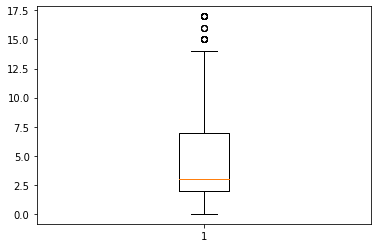

Education


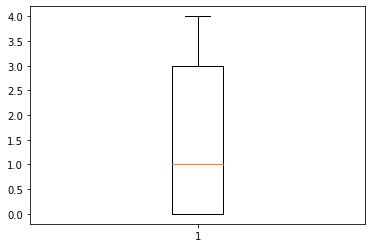

EducationField


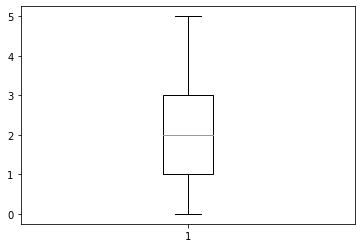

Employee_ID


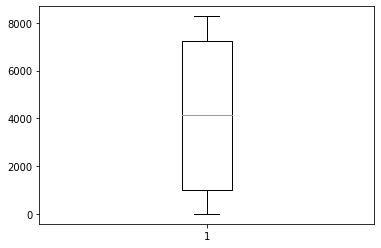

Env_Satisfaction


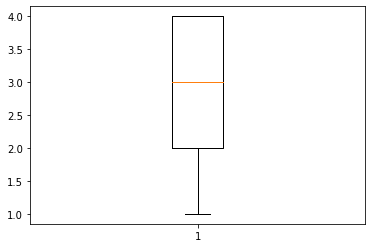

Gender


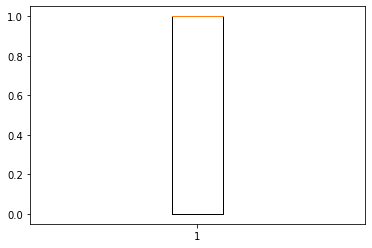

HourlyRate


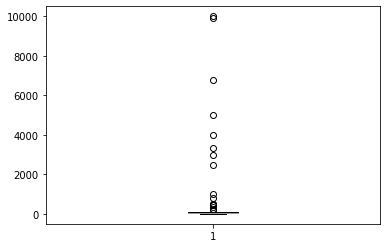

Job_Involvement


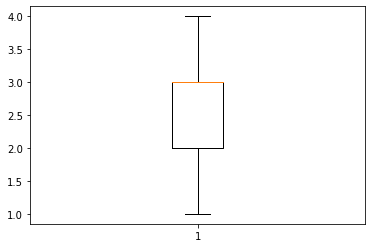

JobLevel


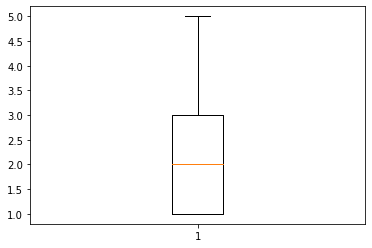

JobRole


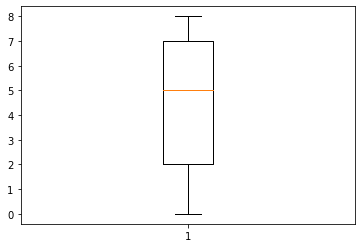

Job satisfac


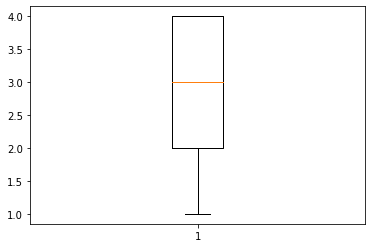

Marital Status


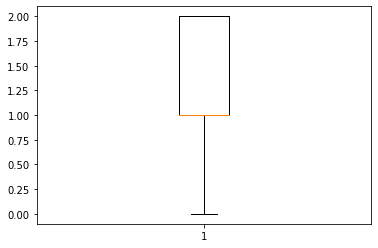

Monthly Income


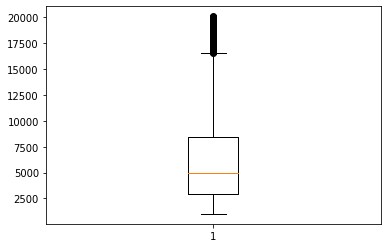

Company Changed


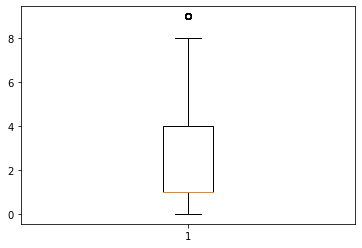

18Yrs


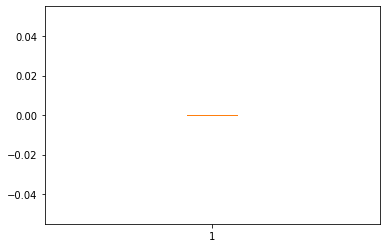

Over Time


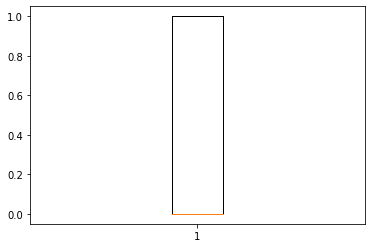

PercentSalaryHike


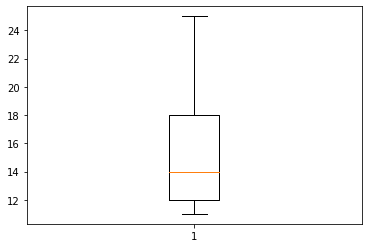

Performance Rating


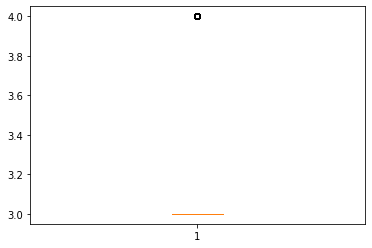

Relationship Satisfaction


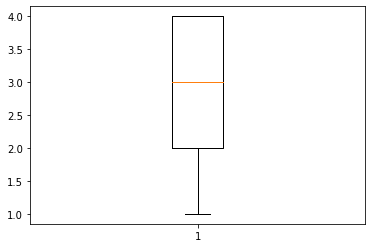

Standard Hours


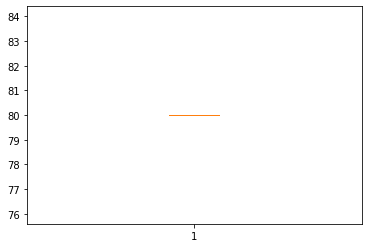

Stock Option Level


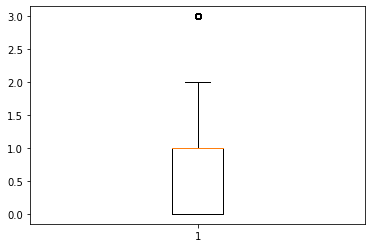

Total Working Years


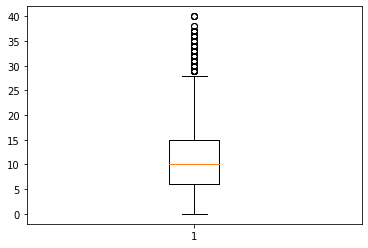

Training time spent


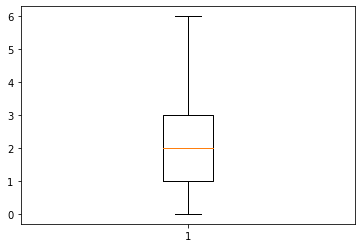

Work LifeBalance


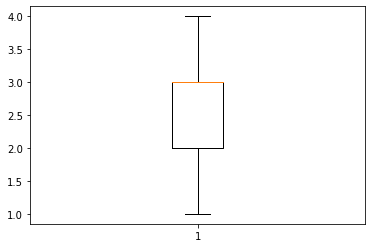

Years @company


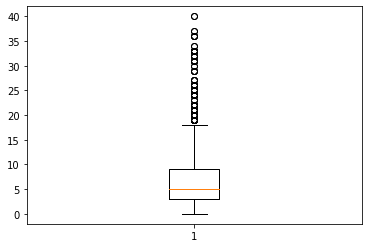

Years@Current role


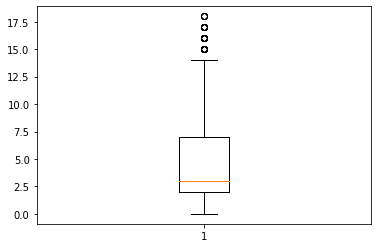

BusinessTravel


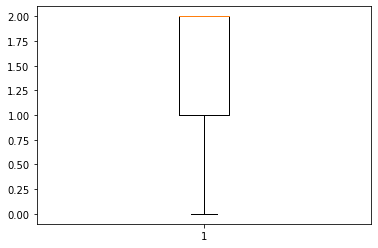

Dept


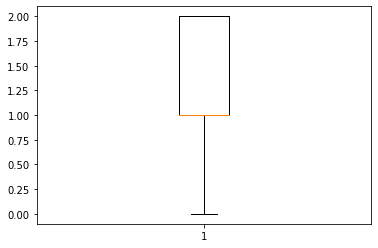

Travel_distance


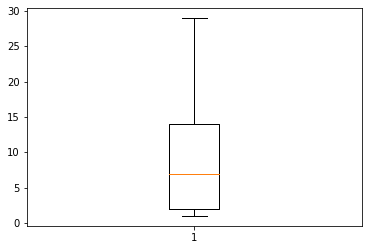

Attrition


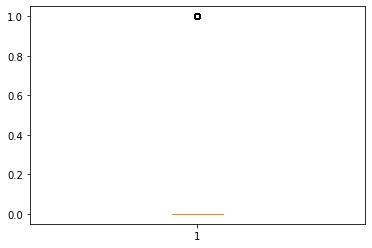

In [25]:
import matplotlib.pyplot as plt
for col in data_no_out:
    a=plt.boxplot(data[col])
    print(col)
    plt.show(a)

In [26]:
data_no_out.shape
#data_no_outliers.head()

(2579, 31)

In [27]:
data_no_out.columns
data_no_out.isnull().any()

Last_promotion_gsp           False
Years@Current Mangers        False
Education                    False
EducationField               False
Employee_ID                  False
Env_Satisfaction             False
Gender                       False
HourlyRate                   False
Job_Involvement              False
JobLevel                     False
JobRole                      False
Job satisfac                 False
Marital Status               False
Monthly Income               False
Company Changed              False
18Yrs                        False
Over Time                    False
PercentSalaryHike            False
Performance Rating           False
Relationship Satisfaction    False
Standard Hours               False
Stock Option Level           False
Total Working Years          False
Training time spent          False
Work LifeBalance             False
Years @company               False
Years@Current role           False
BusinessTravel               False
Dept                

# Feature Engineering

In [28]:
data_Feature_Engineered=data.copy()
data_Feature_Engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Last_promotion_gsp         2940 non-null   int64
 1   Years@Current Mangers      2940 non-null   int64
 2   Education                  2940 non-null   int32
 3   EducationField             2940 non-null   int32
 4   Employee_ID                2940 non-null   int64
 5   Env_Satisfaction           2940 non-null   int64
 6   Gender                     2940 non-null   int32
 7   HourlyRate                 2940 non-null   int64
 8   Job_Involvement            2940 non-null   int64
 9   JobLevel                   2940 non-null   int64
 10  JobRole                    2940 non-null   int32
 11  Job satisfac               2940 non-null   int64
 12  Marital Status             2940 non-null   int32
 13  Monthly Income             2940 non-null   int64
 14  Company Changed         

In [29]:
drop1=['Employee_ID','18Yrs','Standard Hours']
data_Feature_Engineered=data_Feature_Engineered.drop(drop1,axis =1)

AxesSubplot(0.125,0.1925;0.62x0.62)


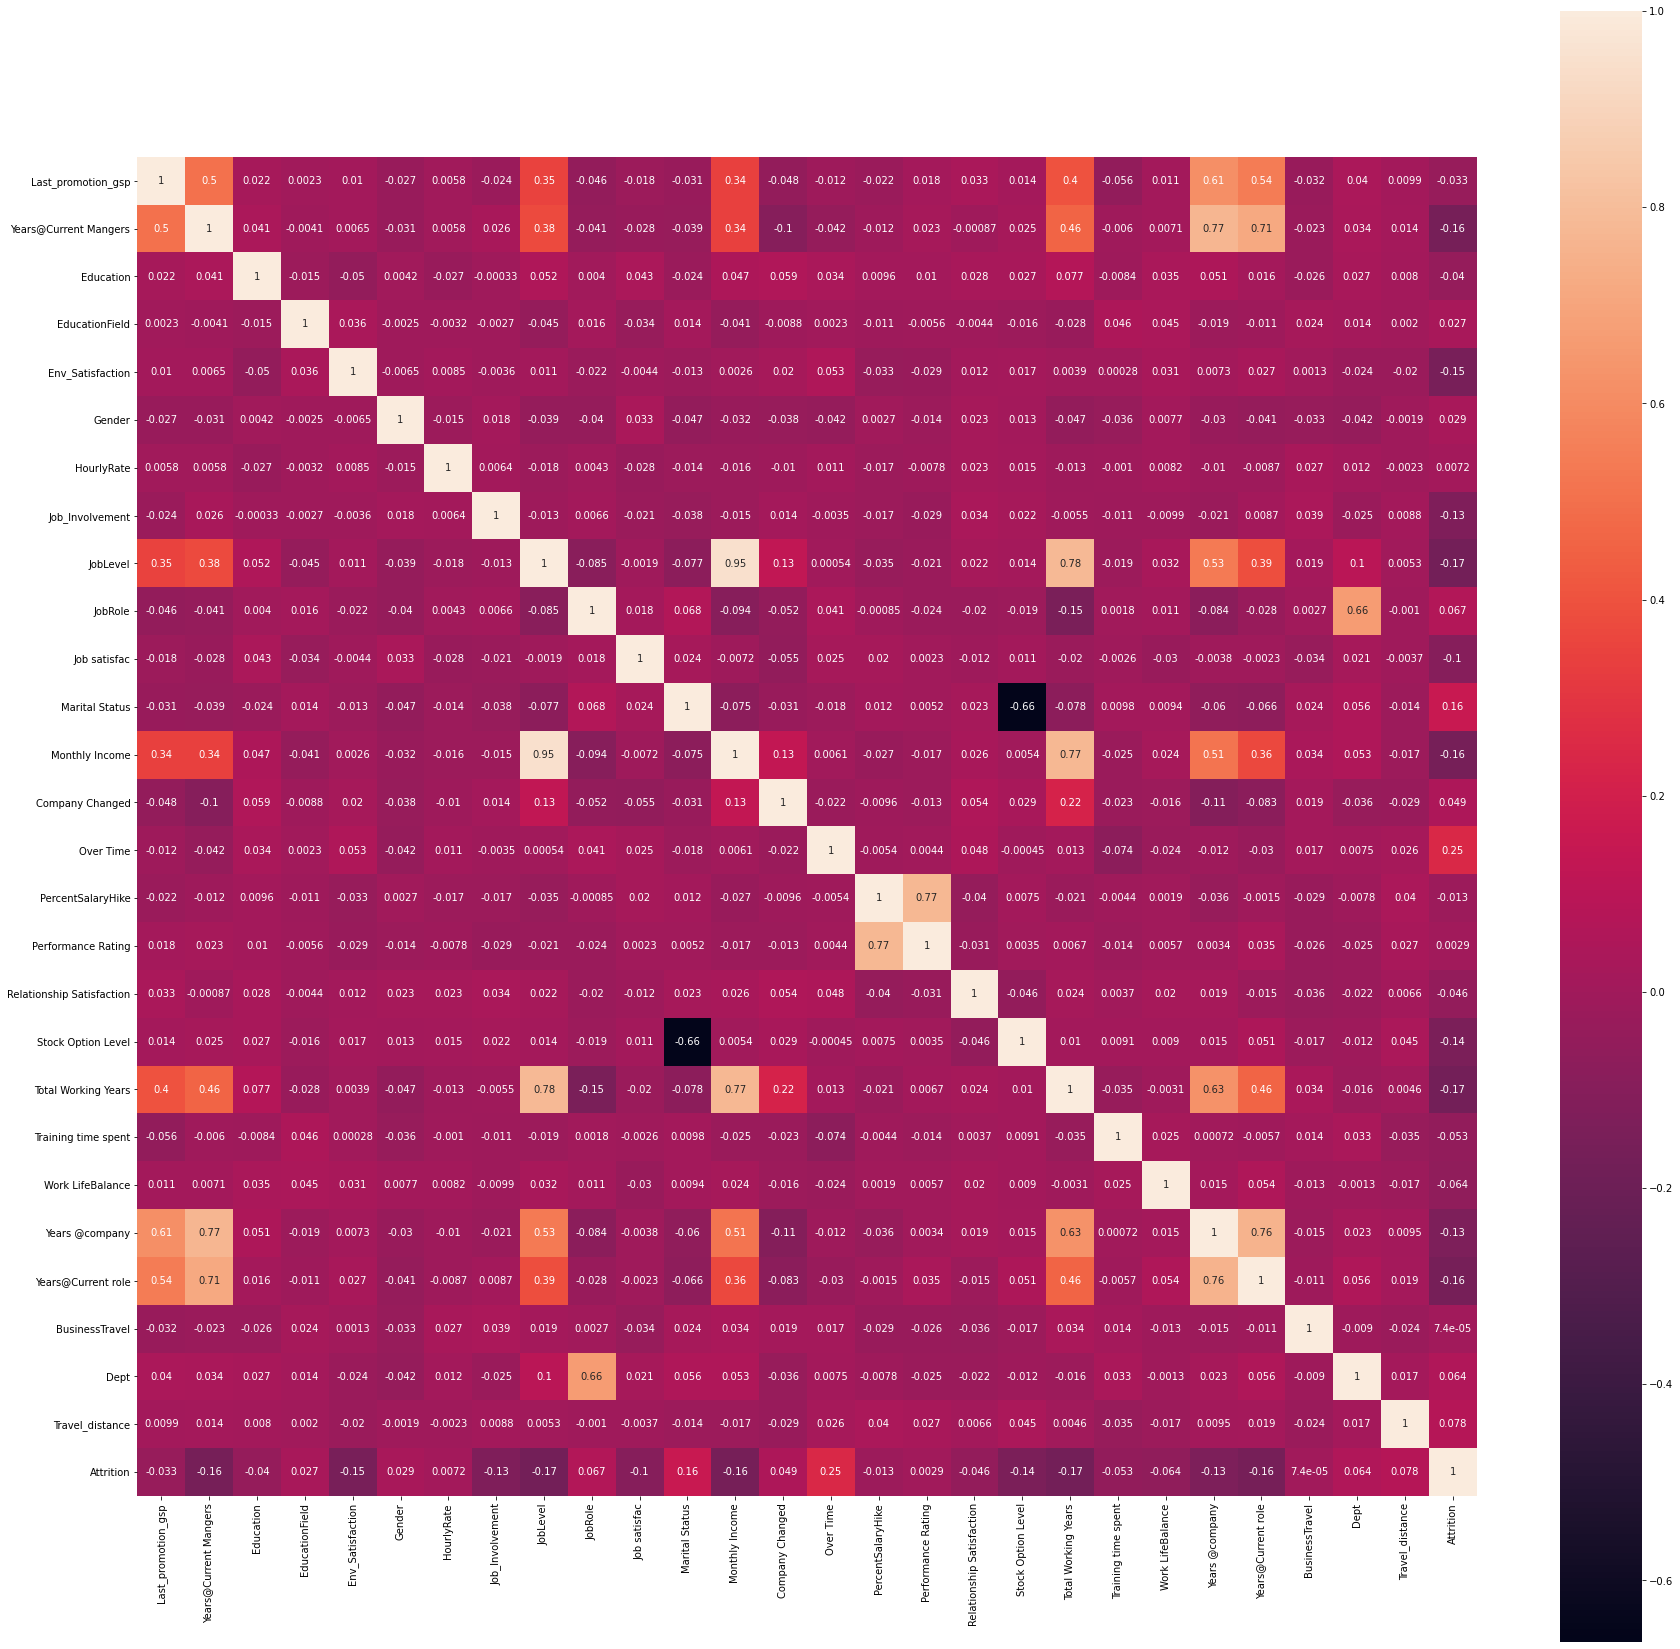

In [30]:
data_Feature_Engineered.columns
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data_Feature_Engineered.corr()
f, ax = plt.subplots(figsize=(30, 30))
hh=sns.heatmap(corrmat,annot =True, square=True)
print(hh)

The above plot gives us the correlation between two features in the data set. We now remove features whose correlation value is more than 0.8 because those features lead to multi collinearity and these can lead to high variance in the model.
So the features are-
Total Working Years: 0.78(approx.'0.80) with Joblevel and 0.77(approx.'0.80) with Monthly Income
JobLevel: 0.95 with MonthlyIncome and 0.78(~0.80) with Total Working Years


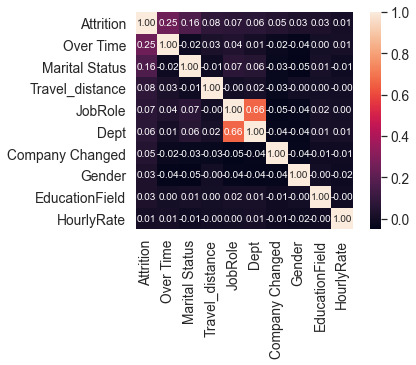

In [31]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition')['Attrition'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
high_corr=['Total Working Years','JobLevel']
data_Feature_Engineered=data_Feature_Engineered.drop(high_corr,axis =1)

In [33]:
data_Feature_Engineered['Comb_Satisfaction'] = data_Feature_Engineered['Env_Satisfaction'] + data_Feature_Engineered['Job satisfac']+data_Feature_Engineered['Job_Involvement']+data_Feature_Engineered['Relationship Satisfaction']
data_Feature_Engineered.head()
comb=['Env_Satisfaction','Job satisfac','Job_Involvement','Relationship Satisfaction']
data_Feature_Engineered=data_Feature_Engineered.drop(comb,axis =1)
data_Feature_Engineered.head()

,Last_promotion_gsp,Years@Current Mangers,Education,EducationField,Gender,HourlyRate,JobRole,Marital Status,Monthly Income,Company Changed,...,Stock Option Level,Training time spent,Work LifeBalance,Years @company,Years@Current role,BusinessTravel,Dept,Travel_distance,Attrition,Comb_Satisfaction
0,0,2,3,0,1,63,1,0,2073,4,...,0,3,3,3,2,2,0,6,1,11
1,2,2,3,0,0,32,3,1,18844,9,...,1,3,3,3,2,0,0,2,0,13
2,4,4,0,0,0,30,3,2,17328,2,...,0,3,3,5,3,0,0,26,0,15
3,4,7,0,0,1,48,1,1,6347,0,...,0,2,1,11,9,2,0,9,0,14
4,1,0,0,0,1,62,1,1,6410,3,...,0,1,3,2,2,2,0,2,0,8


# Modelling

In [34]:
accuracies =dict()
recall = dict()
auc_score=dict()
accuracies_up=dict()
recall_up= dict()
auc_score_up=dict()
accuracies_fea_eng=dict()
recall_fea_eng= dict()
auc_score_fea_eng=dict()

In [35]:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    target = data['Attrition']
    features = data.drop('Attrition', axis = 1)
    #create the train/test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
    #Create the model and train
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train,y_train)
    #predict the results for test
    test_pred = model.predict(X_test)
    #cross val
    scores = cross_val_score(model, features, target,
                                  cv=5,
                                  scoring='accuracy')
    print('CV_accuracy:',scores)
    #test the accuracy
    accuracies['RandomForest Classifier'] = accuracy_score(test_pred, y_test)
    recall['RandomForest Classifier'] = metrics.recall_score(y_test,test_pred)

    print('Accuracy of RandomForest Classifier is: ', accuracy_score(y_test,test_pred))
    print('Recall Score of RndomForest Classifier is: ', metrics.recall_score(y_test, test_pred))
    # confusion matrix
    matrix = confusion_matrix(y_test,test_pred, labels=[1,0])
    print('Confusion matrix : \n',matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,test_pred,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix_cl = classification_report(y_test,test_pred,labels=[1,0])
    print('Classification report : \n',matrix_cl)
    # auc scores
    auc_score['RandomForest Classifier'] = roc_auc_score(y_test, test_pred)
    print('Auc_Score:',roc_auc_score(y_test, test_pred))

CV_accuracy: [0.96428571 0.96768707 0.88435374 0.88945578 0.87585034]
Accuracy of RandomForest Classifier is:  0.9523809523809523
Recall Score of RndomForest Classifier is:  0.7011494252873564
Confusion matrix : 
 [[ 61  26]
 [  2 499]]
Outcome values : 
 61 26 2 499
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.70      0.81        87
           0       0.95      1.00      0.97       501

    accuracy                           0.95       588
   macro avg       0.96      0.85      0.89       588
weighted avg       0.95      0.95      0.95       588

Auc_Score: 0.8485787046596462


<AxesSubplot:>

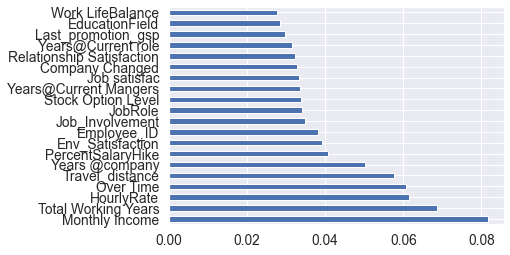

In [36]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [37]:
    target_out = data_no_out['Attrition']
    features_out = data_no_out.drop('Attrition', axis = 1)
    #create the train/test split
    X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(features_out, target_out, test_size=0.2, random_state=10)
    #Create the model and train
    model_out = RandomForestClassifier(n_estimators=100)
    model_out.fit(X_train_out,y_train_out)
    #predict the results for test
    test_pred_out = model_out.predict(X_test_out)
    #cross val
    scores_out = cross_val_score(model_out, features_out, target_out,
                                  cv=5,
                                  scoring='accuracy')
    print('CV_accuracy:',scores_out)
    #test the accuracy
    print('Accuracy of RandomForest Classifier is: ', accuracy_score(y_test_out,test_pred_out))
    print('Recall Score of RndomForest Classifier is: ', metrics.recall_score(y_test_out, test_pred_out))
    # confusion matrix
    matrix_out = confusion_matrix(y_test_out,test_pred_out, labels=[1,0])
    print('Confusion matrix : \n',matrix_out)

    # outcome values order in sklearn
    tp_out, fn_out, fp_out, tn_out = confusion_matrix(y_test_out,test_pred_out,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp_out, fn_out, fp_out, tn_out)

    # classification report for precision, recall f1-score and accuracy
    matrix_cl_out = classification_report(y_test_out,test_pred_out,labels=[1,0])
    print('Classification report : \n',matrix_cl_out)
    # auc scores
    print('Auc_Score:',roc_auc_score(y_test_out, test_pred_out))

CV_accuracy: [0.96124031 0.95542636 0.87403101 0.88565891 0.85825243]
Accuracy of RandomForest Classifier is:  0.9108527131782945
Recall Score of RndomForest Classifier is:  0.6039603960396039
Confusion matrix : 
 [[ 61  40]
 [  6 409]]
Outcome values : 
 61 40 6 409
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.60      0.73       101
           0       0.91      0.99      0.95       415

    accuracy                           0.91       516
   macro avg       0.91      0.79      0.84       516
weighted avg       0.91      0.91      0.90       516

Auc_Score: 0.7947512823571514


In [38]:
data_Feature_Engineered.shape

(2940, 23)

**Random Forest on Feature Engineered data**

In [39]:
target2 = data_Feature_Engineered['Attrition']
features2 = data_Feature_Engineered.drop('Attrition', axis = 1)
#create the train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=10)
#Create the model and train
model2 = RandomForestClassifier()
model2.fit(X_train2,y_train2)
#predict the results for test
test_pred2 = model2.predict(X_test2)
#cross val
scores2 = cross_val_score(model2, features2, target2,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores2)
print("Average accuracy score (across experiments):")
print(scores2.mean())
#test the accuracy

accuracies_fea_eng['RandomForest Classifier'] = accuracy_score(test_pred2, y_test2)
recall_fea_eng['RandomForest Classifier'] = metrics.recall_score(y_test2,test_pred2)

print('Accuracy of RandomForest Classifier is: ', accuracy_score(y_test2,test_pred2))
print('Recall Score of RndomForest Classifier is: ', metrics.recall_score(y_test2, test_pred2))
# confusion matrix
matrix2 = confusion_matrix(y_test2,test_pred2, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp2, fn2, fp2, tn2 = confusion_matrix(y_test2,test_pred2,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp2, fn2, fp2, tn2)

# classification report for precision, recall f1-score and accuracy
matrix_cl2 = classification_report(y_test2,test_pred2,labels=[1,0])
print('Classification report : \n',matrix_cl2)
auc_score_fea_eng['RandomForest Classifier'] = roc_auc_score(y_test2, test_pred2)
print('Auc_Score:',roc_auc_score(y_test2, test_pred2))

CV_accuracy: [0.96258503 0.97789116 0.87585034 0.8962585  0.87585034]
Average accuracy score (across experiments):
0.9176870748299321
Accuracy of RandomForest Classifier is:  0.9625850340136054
Recall Score of RndomForest Classifier is:  0.7701149425287356
Confusion matrix : 
 [[ 61  26]
 [  2 499]]
Outcome values : 
 67 20 2 499
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.77      0.86        87
           0       0.96      1.00      0.98       501

    accuracy                           0.96       588
   macro avg       0.97      0.88      0.92       588
weighted avg       0.96      0.96      0.96       588

Auc_Score: 0.8830614632803359


<AxesSubplot:>

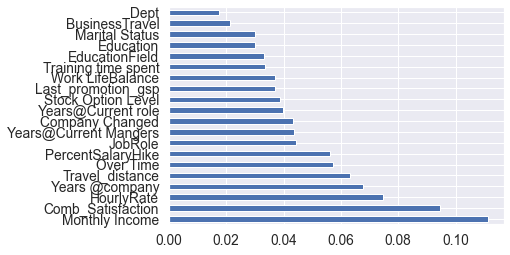

In [40]:
feat_importances2 = pd.Series(model2.feature_importances_, index=features2.columns)
feat_importances2 = feat_importances2.nlargest(20)
feat_importances2.plot(kind='barh')

# upsampling the data set containing Attrition =yes

In [41]:
from sklearn.utils import resample
Attrition_no = data[data.Attrition == 0]
Attrition_yes = data[data.Attrition == 1]

Attrition_yes_up = resample(Attrition_yes,
                                     replace = True,
                                     n_samples = len(Attrition_no),
                                     random_state = 10)

data_up = pd.concat([Attrition_no, Attrition_yes_up])
data_up['Attrition'].value_counts()
data_up.shape
data_up.head(100)

,Last_promotion_gsp,Years@Current Mangers,Education,EducationField,Employee_ID,Env_Satisfaction,Gender,HourlyRate,Job_Involvement,JobLevel,...,Stock Option Level,Total Working Years,Training time spent,Work LifeBalance,Years @company,Years@Current role,BusinessTravel,Dept,Travel_distance,Attrition
1,2,2,3,0,140,3,0,32,2,5,...,1,30,3,3,3,2,0,0,2,0
2,4,4,0,0,148,4,0,30,4,4,...,0,23,3,3,5,3,0,0,26,0
3,4,7,0,0,184,3,1,48,3,2,...,0,12,2,1,11,9,2,0,9,0
4,1,0,0,0,424,1,1,62,2,2,...,0,9,1,3,2,2,2,0,2,0
6,12,6,3,0,731,2,1,73,2,5,...,3,23,2,2,21,6,2,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,15,0,1,206,2,1,60,3,2,...,1,20,2,1,17,9,2,1,9,0
122,1,4,2,1,223,3,1,83,4,3,...,1,12,2,1,5,3,2,1,24,0
123,4,4,0,1,226,3,0,53,3,5,...,0,21,5,3,5,4,2,1,11,0
124,1,8,0,1,227,1,1,56,3,1,...,1,13,2,3,9,8,2,1,14,0


**modelling on upsample data**

In [42]:
target_up = data_up['Attrition']
features_up = data_up.drop('Attrition', axis = 1)
#create the train/test split
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(features_up, target_up, test_size=0.2, random_state=10)
#Create the model and train
model_up = RandomForestClassifier()
model_up.fit(X_train_up,y_train_up)
#predict the results for test
test_pred_up = model_up.predict(X_test_up)
#cross val
scores_up = cross_val_score(model_up, features_up, target_up,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores_up)
print("Average accuracy score (across experiments):")
print(scores_up.mean())
#test the accuracy
accuracies_up['RandomForest Classifier'] = accuracy_score(test_pred_up, y_test_up)
recall_up['RandomForest Classifier'] = metrics.recall_score(y_test_up,test_pred_up)

print('Accuracy of RandomForest Classifier is: ', accuracy_score(y_test_up,test_pred_up))
print('Recall Score of RndomForest Classifier is: ', metrics.recall_score(y_test_up, test_pred_up))
# confusion matrix
matrix_up = confusion_matrix(y_test_up,test_pred_up, labels=[1,0])
print('Confusion matrix : \n',matrix_up)

# outcome values order in sklearn
tp_up, fn_up, fp_up, tn_up = confusion_matrix(y_test_up,test_pred_up,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp_up, fn_up, fp_up, tn_up)

# classification report for precision, recall f1-score and accuracy
matrix_up = classification_report(y_test_up,test_pred_up,labels=[1,0])
print('Classification report : \n',matrix_up)
auc_score_up['RandomForest Classifier'] = roc_auc_score(y_test_up, test_pred_up)
print('Auc_Score:',roc_auc_score(y_test_up, test_pred_up))

CV_accuracy: [0.9929078  0.99696049 0.98782961 0.99290061 0.65212982]
Average accuracy score (across experiments):
0.9245456656617159
Accuracy of RandomForest Classifier is:  0.9949341438703141
Recall Score of RndomForest Classifier is:  1.0
Confusion matrix : 
 [[490   0]
 [  5 492]]
Outcome values : 
 490 0 5 492
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       490
           0       1.00      0.99      0.99       497

    accuracy                           0.99       987
   macro avg       0.99      0.99      0.99       987
weighted avg       0.99      0.99      0.99       987

Auc_Score: 0.9949698189134809


# Modelling Xgboost algorithm

In [43]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False)
model_xgb.fit(X_train, y_train)

#predicting x_test
test_pred_xgb = model_xgb.predict(X_test)
#cross val
scores_xgb = cross_val_score(model_xgb, features, target,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores_xgb)
print("Average accuracy score (across experiments):")
print(scores_xgb.mean())
#appending accuracy score to accuracies dict
accuracies['XGB Classifier'] = accuracy_score(test_pred, y_test)
recall['XGB Classifier'] = metrics.recall_score(test_pred_xgb,y_test)

print('Accuracy Score of XGB Classifier is: ', accuracy_score(test_pred_xgb, y_test))
print('Recall Score of XGB Classifier is: ', metrics.recall_score(test_pred_xgb,y_test))
# confusion matrix
matrix_xgb = confusion_matrix(y_test,test_pred_xgb, labels=[1,0])
print('Confusion matrix : \n',matrix_xgb)

# outcome values order in sklearn
tp_xgb, fn_xgb, fp_xgb, tn_xgb = confusion_matrix(y_test,test_pred_xgb,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp_xgb, fn_xgb, fp_xgb, tn_xgb )

# classification report for precision, recall f1-score and accuracy
matrix_cl_xgb = classification_report(y_test,test_pred_xgb,labels=[1,0])
print('Classification report : \n',matrix_cl_xgb)
auc_score['XGB Classifier'] = roc_auc_score(y_test, test_pred_xgb)
print('Auc_Score:',roc_auc_score(y_test, test_pred_xgb))

[17:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:>

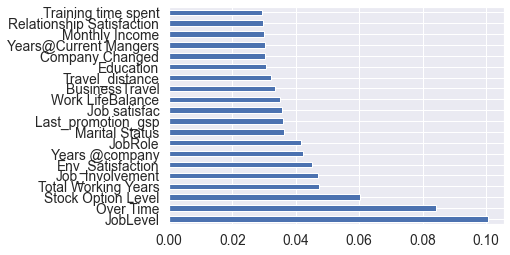

In [44]:
feat_importances_xgb = pd.Series(model_xgb.feature_importances_, index=features.columns)
feat_importances_xgb = feat_importances_xgb.nlargest(20)
feat_importances_xgb.plot(kind='barh')

**XG Boost Feature Engineered data**

In [45]:
model2_xgb = XGBClassifier(use_label_encoder=False)
model2_xgb.fit(X_train2, y_train2)

#predicting x_test
test_pred2_xgb = model2_xgb.predict(X_test2)
#cross val
scores2_xgb = cross_val_score(model2_xgb, features2, target2,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores2_xgb)
print("Average accuracy score (across experiments):")
print(scores2_xgb.mean())
#appending accuracy score to accuracies dict
accuracies_fea_eng['XGB Classifier'] = accuracy_score(test_pred2_xgb, y_test2)
recall_fea_eng['XGB Classifier'] = metrics.recall_score(test_pred2_xgb,y_test2)

print('Accuracy Score of XGB Classifier is: ', accuracy_score(test_pred2_xgb, y_test2))
print('Recall Score of XGB Classifier is: ', metrics.recall_score(test_pred2_xgb,y_test2))
# confusion matrix
matrix2_xgb = confusion_matrix(y_test2,test_pred2_xgb, labels=[1,0])
print('Confusion matrix : \n',matrix2_xgb)

# outcome values order in sklearn
tp2_xgb, fn2_xgb, fp2_xgb, tn2_xgb = confusion_matrix(y_test2,test_pred2_xgb,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp2_xgb, fn2_xgb, fp2_xgb, tn2_xgb )

# classification report for precision, recall f1-score and accuracy
matrix_cl2_xgb = classification_report(y_test2,test_pred2_xgb,labels=[1,0])
print('Classification report : \n',matrix_cl_xgb)
auc_score_fea_eng['XGB Classifier'] = roc_auc_score(y_test2, test_pred2_xgb)
print('Auc_Score:',roc_auc_score(y_test2, test_pred2_xgb))

[17:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:>

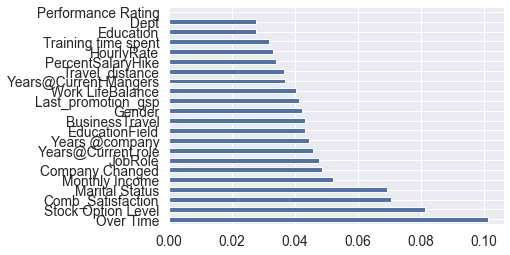

In [46]:
feat_importances2_xgb = pd.Series(model2_xgb.feature_importances_, index=features2.columns)
feat_importances2_xgb = feat_importances2_xgb.nlargest(25)
feat_importances2_xgb.plot(kind='barh')

**XG Bosst on upsampled data**

In [47]:
from xgboost import XGBClassifier
target_up = data_up['Attrition']
features_up = data_up.drop('Attrition', axis = 1)
#create the train/test split
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(features_up, target_up, test_size=0.2, random_state=10)
model_xgb_up = XGBClassifier(use_label_encoder=False)
model_xgb_up.fit(X_train_up, y_train_up)

#predicting x_test
test_pred_up_xgb = model_xgb_up.predict(X_test_up)
#cross val
scores_xgb_up= cross_val_score(model_xgb_up, features_up, target_up,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores_xgb_up)
print("Average accuracy score (across experiments):")
print(scores_xgb.mean())
#appending accuracy score to accuracies dict
accuracies_up['XGB Classifier'] = accuracy_score(test_pred_up_xgb, y_test_up)
recall_up['XGB Classifier'] = metrics.recall_score(test_pred_up_xgb,y_test_up)

print('Accuracy Score of XGB Classifier is: ', accuracy_score(test_pred_up_xgb, y_test_up))
print('Recall Score of XGB Classifier is: ', metrics.recall_score(test_pred_up_xgb,y_test_up))
# confusion matrix
matrix_up_xgb = confusion_matrix(y_test_up,test_pred_up_xgb, labels=[1,0])
print('Confusion matrix : \n',matrix_up_xgb)

# outcome values order in sklearn
tp_up_xgb, fn_up_xgb, fp_up_xgb, tn_up_xgb = confusion_matrix(y_test_up,test_pred_up_xgb,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp_up_xgb, fn_up_xgb, fp_up_xgb, tn_up_xgb )

# classification report for precision, recall f1-score and accuracy
matrix_cl_up_xgb = classification_report(y_test_up,test_pred_up_xgb,labels=[1,0])
print('Classification report : \n',matrix_cl_up_xgb)
auc_score_up['XGB Classifier'] = roc_auc_score(y_test_up, test_pred_up_xgb)
print('Auc_Score:',roc_auc_score(y_test_up, test_pred_up_xgb))

[17:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Logestic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
model_lgr = LogisticRegression(max_iter=100000)
model_lgr.fit(X_train, y_train)

test_pred_lgr = model_lgr.predict(X_test)
#cross val
scores_lgr = cross_val_score(model_lgr, features, target,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores_lgr)
print("Average accuracy score (across experiments):")
print(scores_lgr.mean())

accuracies['Logistic Regression'] = accuracy_score(y_test, test_pred_lgr)
recall['Logistic Regression'] = metrics.recall_score(y_test,test_pred_lgr)

print('Accuracy Score of Logistic Regression is: ', accuracy_score(y_test, test_pred_lgr))
print('Recall Score of Logistic Regression Model is: ', metrics.recall_score(y_test, test_pred_lgr))
# confusion matrix
matrix_lgr = confusion_matrix(y_test,test_pred_lgr, labels=[1,0])
print('Confusion matrix : \n',matrix_lgr)

# outcome values order in sklearn
tp_lgr, fn_lgr, fp_lgr, tn_lgr = confusion_matrix(y_test,test_pred_lgr,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp_lgr, fn_lgr, fp_lgr, tn_lgr  )

# classification report for precision, recall f1-score and accuracy
matrix_cl_lgr = classification_report(y_test,test_pred_lgr,labels=[1,0])
print('Classification report : \n',matrix_cl_lgr)
auc_score['Logistic Regression'] = roc_auc_score(y_test, test_pred_lgr)
print('Auc_Score:',roc_auc_score(y_test, test_pred_lgr))

CV_accuracy: [0.87585034 0.88435374 0.85884354 0.86054422 0.8537415 ]
Average accuracy score (across experiments):
0.8666666666666668
Accuracy Score of Logistic Regression is:  0.8639455782312925
Recall Score of Logistic Regression Model is:  0.3448275862068966
Confusion matrix : 
 [[ 30  57]
 [ 23 478]]
Outcome values : 
 30 57 23 478
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.34      0.43        87
           0       0.89      0.95      0.92       501

    accuracy                           0.86       588
   macro avg       0.73      0.65      0.68       588
weighted avg       0.85      0.86      0.85       588

Auc_Score: 0.6494597012870811


**Logestic Regression on Feature Engineered data**

In [49]:
model2_lgr = LogisticRegression(max_iter=100000)
model2_lgr.fit(X_train2, y_train2)

test_pred2_lgr = model2_lgr.predict(X_test2)
#cross val
scores2_lgr = cross_val_score(model2_lgr, features2, target2,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores2_lgr)
print("Average accuracy score (across experiments):")
print(scores2_lgr.mean())

accuracies_fea_eng['Logistic Regression'] = accuracy_score(y_test2, test_pred2_lgr)
recall_fea_eng['Logistic Regression'] = metrics.recall_score(y_test2,test_pred2_lgr)

print('Accuracy Score of Logistic Regression is: ', accuracy_score(y_test2, test_pred2_lgr))
print('Recall Score of Logistic Regression Model is: ', metrics.recall_score(y_test2, test_pred2_lgr))
# confusion matrix
matrix2_lgr = confusion_matrix(y_test2,test_pred2_lgr, labels=[1,0])
print('Confusion matrix : \n',matrix2_lgr)

# outcome values order in sklearn
tp2_lgr, fn2_lgr, fp2_lgr, tn2_lgr = confusion_matrix(y_test2,test_pred2_lgr,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp2_lgr, fn2_lgr, fp2_lgr, tn2_lgr  )

# classification report for precision, recall f1-score and accuracy
matrix2_cl_lgr = classification_report(y_test2,test_pred2_lgr,labels=[1,0])
print('Classification report : \n',matrix2_cl_lgr)
auc_score_fea_eng['Logistic Regression'] = roc_auc_score(y_test2, test_pred2_lgr)
print('Auc_Score:',roc_auc_score(y_test2, test_pred2_lgr))

CV_accuracy: [0.87414966 0.88435374 0.86394558 0.85714286 0.8452381 ]
Average accuracy score (across experiments):
0.8649659863945578
Accuracy Score of Logistic Regression is:  0.8656462585034014
Recall Score of Logistic Regression Model is:  0.3218390804597701
Confusion matrix : 
 [[ 28  59]
 [ 20 481]]
Outcome values : 
 28 59 20 481
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.32      0.41        87
           0       0.89      0.96      0.92       501

    accuracy                           0.87       588
   macro avg       0.74      0.64      0.67       588
weighted avg       0.85      0.87      0.85       588

Auc_Score: 0.6409594603895657


**Logestic Regression on Up_sampled data**

In [50]:
from sklearn.linear_model import LogisticRegression
model_up_lgr = LogisticRegression(max_iter=100000)
model_up_lgr.fit(X_train_up, y_train_up)

test_pred_up_lgr = model_lgr.predict(X_test_up)
#cross val
scores_up_lgr = cross_val_score(model_lgr, features_up, target_up,
                              cv=5,
                              scoring='accuracy')
print('CV_accuracy:',scores_up_lgr)
print("Average accuracy score (across experiments):")
print(scores_up_lgr.mean())

accuracies_up['Logistic Regression'] = accuracy_score(y_test_up, test_pred_up_lgr)
recall_up['Logistic Regression_up'] = metrics.recall_score(y_test_up,test_pred_up_lgr)

print('Accuracy Score of Logistic Regression is: ', accuracy_score(y_test_up, test_pred_up_lgr))
print('Recall Score of Logistic Regression Model is: ', metrics.recall_score(y_test_up, test_pred_up_lgr))
# confusion matrix
matrix_up_lgr = confusion_matrix(y_test_up,test_pred_up_lgr, labels=[1,0])
print('Confusion matrix : \n',matrix_up_lgr)

# outcome values order in sklearn
tp_up_lgr, fn_up_lgr, fp_up_lgr, tn_up_lgr = confusion_matrix(y_test_up,test_pred_up_lgr,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp_up_lgr, fn_up_lgr, fp_up_lgr, tn_up_lgr )

# classification report for precision, recall f1-score and accuracy
matrix_cl_up_lgr = classification_report(y_test_up,test_pred_up_lgr,labels=[1,0])
print('Classification report : \n',matrix_cl_up_lgr)
auc_score_up['Logistic Regression'] = roc_auc_score(y_test_up, test_pred_up_lgr)
print('Auc_Score:',roc_auc_score(y_test_up, test_pred_up_lgr))

CV_accuracy: [0.7112462  0.74772036 0.75557809 0.70588235 0.62981744]
Average accuracy score (across experiments):
0.7100488911632151
Accuracy Score of Logistic Regression is:  0.6838905775075987
Recall Score of Logistic Regression Model is:  0.4061224489795918
Confusion matrix : 
 [[199 291]
 [ 21 476]]
Outcome values : 
 199 291 21 476
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.41      0.56       490
           0       0.62      0.96      0.75       497

    accuracy                           0.68       987
   macro avg       0.76      0.68      0.66       987
weighted avg       0.76      0.68      0.66       987

Auc_Score: 0.6819344639264157


accuracy


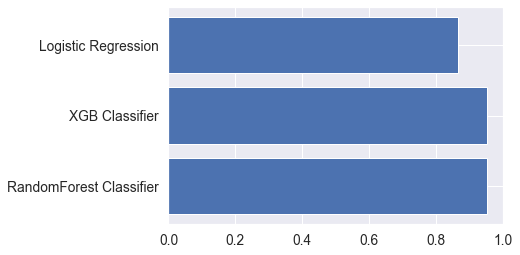

recall


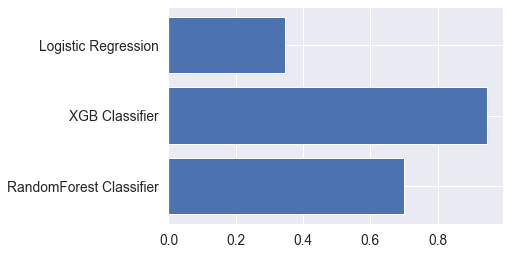

Auc_score


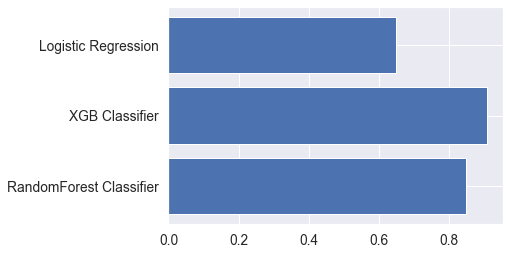

In [51]:
plt.barh(*zip(*accuracies.items()))
print("accuracy")
plt.show()
plt.barh(*zip(*recall.items()))
print("recall")
plt.show()
plt.barh(*zip(*auc_score.items()))
print("Auc_score")
plt.show()

accuracy_feature_engineered


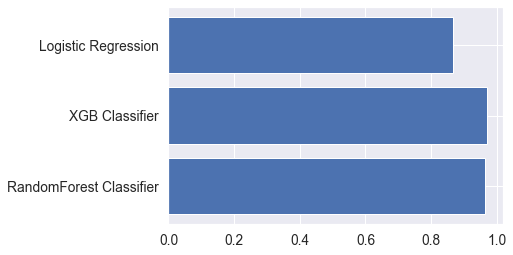

recall_feature_engineered


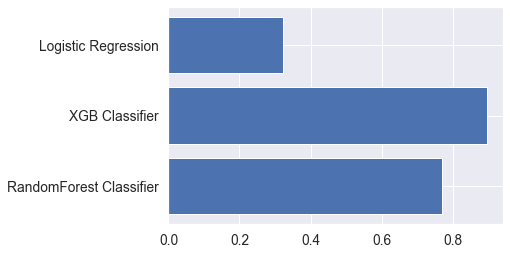

Auc_score_feature_engineered


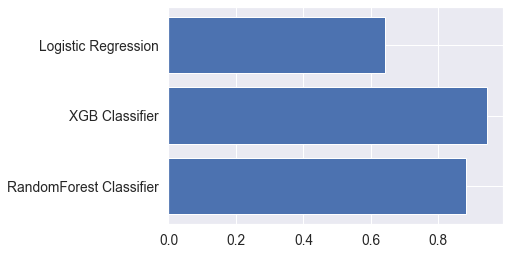

In [52]:
plt.barh(*zip(*accuracies_fea_eng.items()))
print("accuracy_feature_engineered")
plt.show()
plt.barh(*zip(*recall_fea_eng.items()))
print("recall_feature_engineered")
plt.show()
plt.barh(*zip(*auc_score_fea_eng.items()))
print("Auc_score_feature_engineered")
plt.show()

Accuracy_up


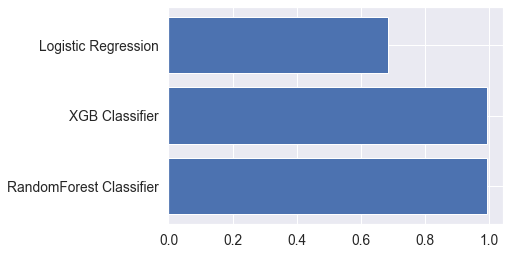

recall_up


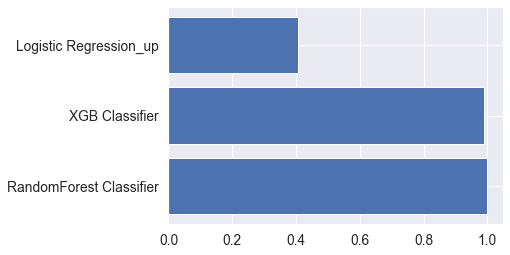

Auc_score_up


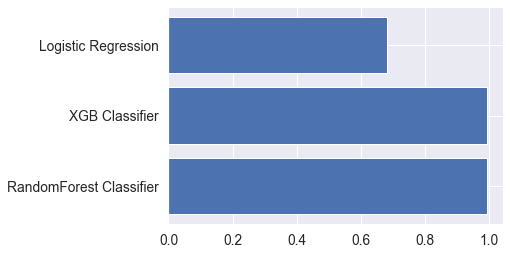

In [53]:
plt.barh(*zip(*accuracies_up.items()))
print("Accuracy_up")
plt.show()
plt.barh(*zip(*recall_up.items()))
print("recall_up")
plt.show()
plt.barh(*zip(*auc_score_up.items()))
print("Auc_score_up")
plt.show()